Implement the de Boor algorithm (Dahmen+Reusken Alg 9.12) for evaluating spline functions 

$$ \sum c_j N_{j,k}(x).$$

Familiarize yourself also with the scipy.interpolate.splev function and related functions.

Consider the curve given by
$$ \gamma: [0,1]→ R^2: t→((t+ 1) cos(4\pi t),(t+ 1) sin(4 \pi t))$$

Choose control points $p_j=\gamma(j/n)$, and plot the spline functions 

$$t → ∑_{j=0}^n p_j N_{j,k}(t)$$
for $k= 1,2,3,4$.

Choose uniformly distributed knots, with k multiple knots at the ends. Note that choosing the control points at the curve does not lead to optimal approximation of the curve by the spline-curve.

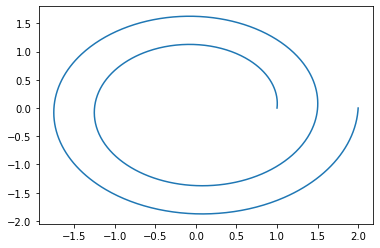

In [78]:
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(0, 1, 1000)

def gamma_fun(t):
    return (t+1)*np.cos(4*np.pi*t), (t+1)*np.sin(4*np.pi*t)

x, y = gamma_fun(t)

plt.figure()
plt.plot(x, y)

In [79]:
def deBoor(t, x, c, k):
    """
    Evaluates S(x).

    Args
    ----
    x: position
    t: array of knot positions
    c: array of control points
    k: degree of B-spline
    """
    
    n = t.size
    
    # 1: find interval containing x
    m = np.logical_and((x >= t[:-1]), (x < t[1:])).nonzero()[0][0]
    
    # 2: initalize c_j^[0] = c_j
    
    # 3: recursively calculate c_j^[p]
    for p in range(1, k):
        print("asdasdasd")
        for j in range(p, 0, -1):
            c[j] = (x-t[j]) / (t[j+k-p] - t[j]) * c[j] + (t[j+k-p] - x)/(t[j+k-p] - t[j])
            print(c)

    # 4: return the c_m^[k-1] element as the result
    return c[0]   


In [81]:

def deBoor(t, x, c, p):
    """
    Evaluates S(x).

    Args
    ----
    k: index of knot interval that contains x
    x: position
    t: array of knot positions, needs to be padded as described above
    c: array of control points
    p: degree of B-spline
    """
    k = np.logical_and((x >= t[:-1]), (x < t[1:])).nonzero()[0][0]
    
    d = [c[j + k - p] for j in range(0, p+1)]

    for r in range(1, p+1):
        for j in range(p, r-1, -1):
            alpha = (x - t[j+k-p]) / (t[j+1+k-r] - t[j+k-p])
            d[j] = (1.0 - alpha) * d[j-1] + alpha * d[j]

    return d[p]

IndexError: index 15 is out of bounds for axis 0 with size 15

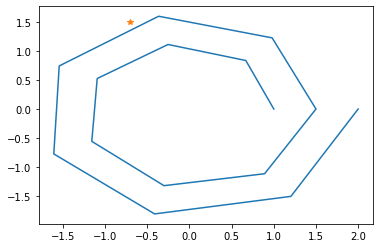

In [85]:
plt.figure()
x, y = gamma_fun(t)
plt.plot(x, y)
x, y = gamma_fun(0.66)
plt.plot(x, y, '*')

# control points:
n = 15
t = np.linspace(0, 1, n, endpoint=True)
p_x, p_y = gamma_fun(t)

t_x_list = np.linspace(0, 1, 100, endpoint=True)
t_x_list = np.concatenate((np.ones(t_x_list.size)*t_x_list[0], t_x_list, np.ones(t_x_list.size)*t_x_list[-1]))

spline_x = np.empty(t_x_list.size)
spline_y = np.empty(t_x_list.size)

k = 3

# deBoor(t, 0.66, p_y, k)



for idx, t_x in enumerate(t_x_list):
    spline_x[idx] = deBoor(t, t_x, p_x, k)
    spline_y[idx] = deBoor(t, t_x, p_y, k)
    
plt.plot(spline_x, spline_y, '--')

In [84]:
t_x_list

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99])